# Fragment-Lead Pairs: A first look

In [28]:
import os
print('Current conda environment:', os.environ['CONDA_DEFAULT_ENV'])

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(42)

Current conda environment: reinvent4


In [29]:
import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit.Chem import AllChem, rdFingerprintGenerator
import useful_rdkit_utils as uru
from rdkit import DataStructs

sns.set(rc = {'figure.figsize':(15,8)})

In [30]:
fragment_lead_pairs = pd.read_csv('data/fragment_lead_pairs.csv')

In [31]:
fragment_lead_pairs

,Year,Table_Entry,Fragment,Lead
0,2022,1,Nc1cc(c[nH]c1=O)C(F)(F)F,N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1
1,2022,2,CN1C[C@@H](O)[C@H](C1=O)c2ccc(C)cc2,COc1ccc(CN2C[C@H](O)[C@](CCC(C)C)(C2=O)c3ccc(c...
2,2022,3,Fc1cncc(c1)N2C(=O)N[C@@H](Cc3ccccc3)C2=O,Clc1ccccc1C2CC3(C2)NC(=O)N(C3=O)c4cncc5ccccc45
3,2022,4,c1ccc(cc1)c2ccccc2c3nnn[nH]3,Cc1ccc(cc1)c2cccc(c2c3nnn[nH]3)S(=O)(=O)N
4,2022,5,CN(C)C(=O)C(N)Cc1ccc(F)cc1,Clc1ccc(cc1)[C@H]2CN[C@H](C2)C(=O)N3CCN(CC3)c4...
...,...,...,...,...
162,2016,23,CC1Cn2c(cc3cccc(S1)c23)C(=O)O,Cc1cc(OCCCc2c(C(=O)O)n3CCCc4c(Cl)ccc2c43)cc(C)...
163,2016,24,COC(=O)[C@@H](N)Cc1c[nH]c2ccccc12,Clc1sc(cc1Br)S(=O)(=O)NCCc2c[nH]c3ccccc23
164,2016,25,OC(=O)c1cc(c2ccccc2)n(n1)c3ccccc3,OC(=O)c1ccc(o1)c2ccc(Cl)c(c2)C(=S)NCc3ccc(cc3)...
165,2016,26,O=C(CN1CCNCC1)N2CCCCC2,COC[C@H]1CN[C@H](C)CN1CC(=O)N2CC(C)(C)c3cnc(Cc...


In [32]:
initial_fragment_smiles, lead_smiles = fragment_lead_pairs['Fragment'][0], fragment_lead_pairs['Lead'][0]

In [33]:
os.environ["SMILES"] = initial_fragment_smiles
command = f'python3 generate_analogs.py --toml_file sampling.toml --smiles \'{initial_fragment_smiles}\' --dock'
# subprocess.run(command, check=True)

In [34]:
initial_fragment_smiles, lead_smiles

('Nc1cc(c[nH]c1=O)C(F)(F)F', 'N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1')

In [35]:
## RUN IN TERMINAL: 
# 
#              
#            python3 generate_analogs.py --toml_file sampling.toml --smiles 'Nc1cc(c[nH]c1=O)C(F)(F)F' --lead 'N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1' --dock
#
#
# ... WAIT UNTIL AFTER DOCKING HAS FINISHED

In [36]:
analogs = pd.read_csv('data/dataframe.csv')

In [37]:
print(analogs.shape)
analogs

(426, 8)


,Unnamed: 0,SMILES,Input_SMILES,Tanimoto,Name,Success,ID,Docking score
0,0,N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1,Nc1cc(c[nH]c1=O)C(F)(F)F,NaN,MOL0000,False,MOL0000,-7.300167
1,1,CC(C)(C)c1c[nH]c(=O)c(N)c1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.550000,MOL0001,False,MOL0001,-6.790637
2,2,Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,1.000000,MOL0002,False,MOL0002,-6.669536
3,3,CCc1c[nH]c(=O)c(N)c1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.450000,MOL0003,False,MOL0003,-6.736929
4,4,CCNc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.581395,MOL0004,False,MOL0004,-7.754296
...,...,...,...,...,...,...,...,...
421,421,CC1CN(c2cc(C(F)(F)F)c[nH]c2=O)C(=O)O1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.441860,MOL0421,False,MOL0421,-7.723195
422,422,O=C(Nc1cc(C(F)(F)F)c[nH]c1=O)C1CC1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.360000,MOL0422,False,MOL0422,-7.649107
423,423,CC(C)(C)[C@H]1CN(c2cc(C(F)(F)F)c[nH]c2=O)C(=O)O1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.404255,MOL0423,False,MOL0423,-8.423723
424,424,Nc1cc(Cn2cc(C(F)(F)F)cc(N)c2=O)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,NaN,MOL0424,False,MOL0424,-5.164618


In [38]:
analogs['Tanimoto'].mean()

0.4558167182814971

In [39]:
print(lead_smiles in analogs['SMILES'][1:].to_list())

False


## Visualizing the Distribution

In [40]:
smiles = analogs['SMILES'][1:].to_numpy()

mols = [Chem.MolFromSmiles(smile) for smile in smiles]

initial_fragment = Chem.MolFromSmiles(initial_fragment_smiles)
lead_mol = Chem.MolFromSmiles(lead_smiles)

In [41]:
fpgen = AllChem.GetMorganGenerator()

fingerprints = np.array([fpgen.GetFingerprint(mol).ToList() for mol in mols])

initial_fragment_fp = np.array([fpgen.GetFingerprint(initial_fragment)])
lead_fp = np.array([fpgen.GetFingerprint(lead_mol).ToList()])

X = np.vstack((initial_fragment_fp, fingerprints, lead_fp))

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
pca = PCA(n_components=3, random_state=0)
pca_fps = pca.fit_transform(X)

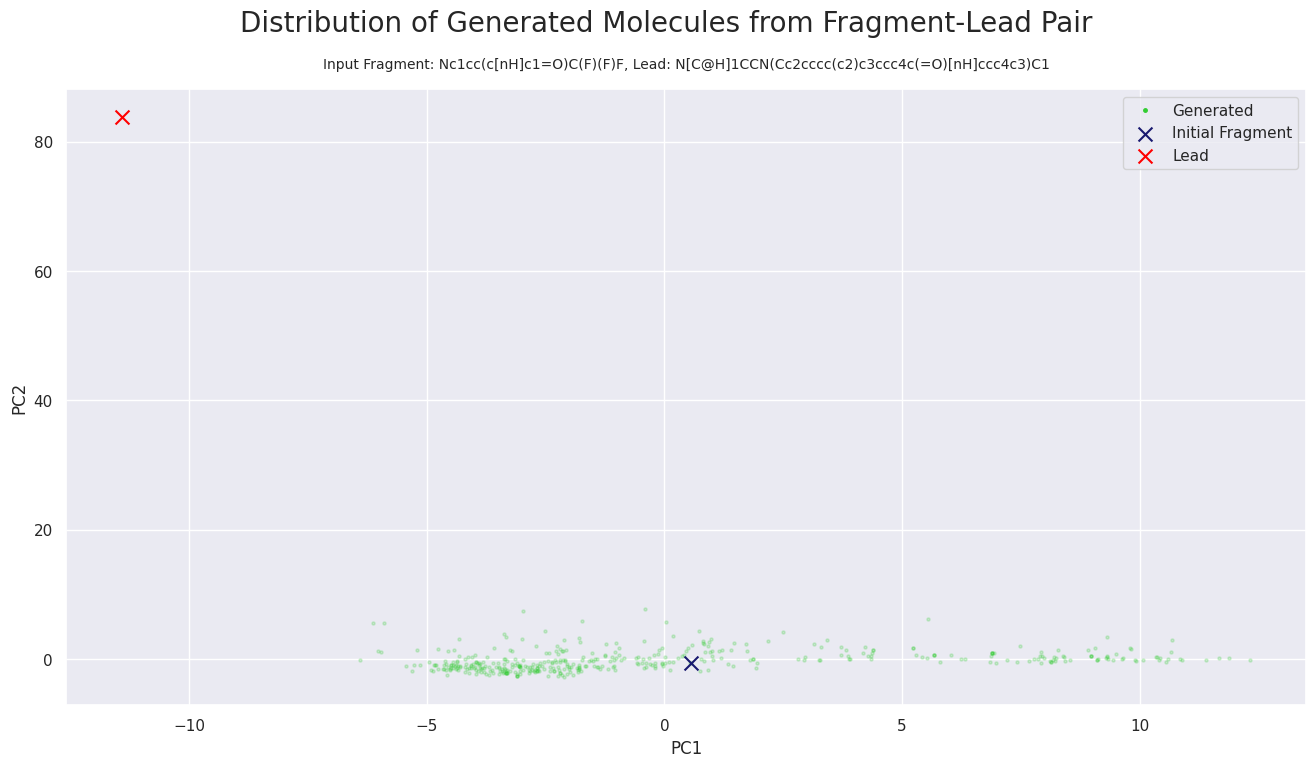

In [44]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))

ax.scatter(pca_fps.T[0][1:-1], pca_fps.T[1][1:-1], s=5, c='limegreen', label='Generated', alpha=.2)
ax.scatter(pca_fps.T[0][0], pca_fps.T[1][0], s=100, c='midnightblue', marker='x', label='Initial Fragment')
ax.scatter(pca_fps.T[0][-1], pca_fps.T[1][-1], s=100, c='red', marker='x', label='Lead')

handles, labels = ax.get_legend_handles_labels()
handles[0] = plt.Line2D([], [], marker='.', color='limegreen', linestyle='None', markersize=5, alpha=1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')


ax.legend(handles, labels)

fig.suptitle('Distribution of Generated Molecules from Fragment-Lead Pair', fontsize=20)

subtitle = f'Input Fragment: {initial_fragment_smiles}, Lead: {lead_smiles}'
ax.set_title(subtitle, fontsize=10, y=1.02);

From this plot, it seems that the model is not generating analogs in the same chemical space as the lead molecule.

## Assessing Binding Affinity

In [45]:
lead_docking_score = analogs.iloc[0]['Docking score']

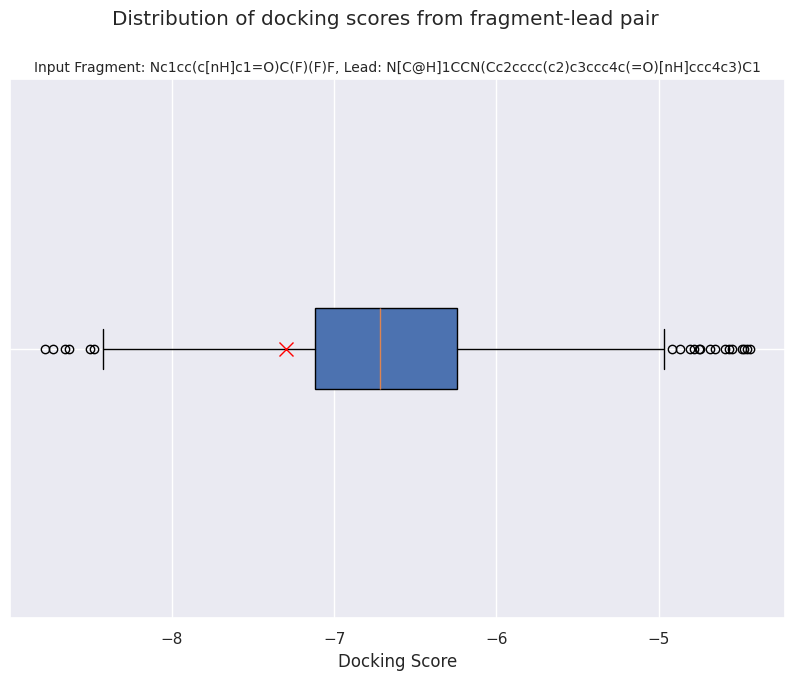

In [46]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot(analogs['Docking score'], vert=False, patch_artist=True)

plt.plot(lead_docking_score, 1, 'x', markersize=10, color='red')

plt.xlabel('Docking Score')

ax = plt.gca()
ax.set(yticklabels=[])

title = f'Distribution of docking scores from fragment-lead pair'
subtitle = f'Input Fragment: {initial_fragment_smiles}, Lead: {lead_smiles}'

fig.suptitle(title)
plt.title(subtitle, fontsize=10);

## Investigating Tanimoto Similarity

In [47]:
def tanimoto_similarity(smi_1, smi_2, use_counts=False):
    fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048,countSimulation=True)
    mol_1 = Chem.MolFromSmiles(smi_1)
    mol_2 = Chem.MolFromSmiles(smi_2)
    if use_counts:
        fp_1 = rdFingerprintGenerator.GetCountFPs([mol_1])[0]
        fp_2 = rdFingerprintGenerator.GetCountFPs([mol_2])[0]
    else:
        fp_1 = rdFingerprintGenerator.GetFPs([mol_1])[0]
        fp_2 = rdFingerprintGenerator.GetFPs([mol_2])[0]
    return DataStructs.TanimotoSimilarity(fp_1, fp_2)

In [49]:
similarities_to_lead = [tanimoto_similarity(analog, lead_smiles, True) for analog in analogs['SMILES'].values]

In [50]:
analogs['sim_to_lead'] = similarities_to_lead

In [53]:
analogs.sort_values('sim_to_lead', ascending=False, inplace=True)

analogs

,Unnamed: 0,SMILES,Input_SMILES,Tanimoto,Name,Success,ID,Docking score,sim_to_lead
0,0,N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1,Nc1cc(c[nH]c1=O)C(F)(F)F,NaN,MOL0000,False,MOL0000,-7.300167,1.000000
178,178,Nc1cc(-c2cccc(C(F)(F)F)c2)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,NaN,MOL0178,False,MOL0178,-6.648698,0.293478
383,383,Nc1cc(-c2ccc(F)cc2)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.360000,MOL0383,False,MOL0383,-7.113871,0.287356
24,24,Nc1cc(-c2ccccc2)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.400000,MOL0024,False,MOL0024,-6.608237,0.279070
69,69,Nc1cc(Cc2ccccc2)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.363636,MOL0069,False,MOL0069,-6.885932,0.269663
...,...,...,...,...,...,...,...,...,...
109,109,Nc1cc(C(F)(F)F)cnc1N,Nc1cc(C(F)(F)F)c[nH]c1=O,NaN,MOL0109,False,MOL0109,-6.153137,0.074468
10,10,Nc1cc(C(F)(F)F)cnc1O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.476190,MOL0010,False,MOL0010,-5.761381,0.074468
298,298,Nc1ncc(C(F)(F)F)cc1O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.428571,MOL0298,False,MOL0298,-5.967862,0.074468
160,160,CNc1ncc(C(F)(F)F)cc1N,Nc1cc(C(F)(F)F)c[nH]c1=O,0.450000,MOL0160,False,MOL0160,-5.671219,0.072165


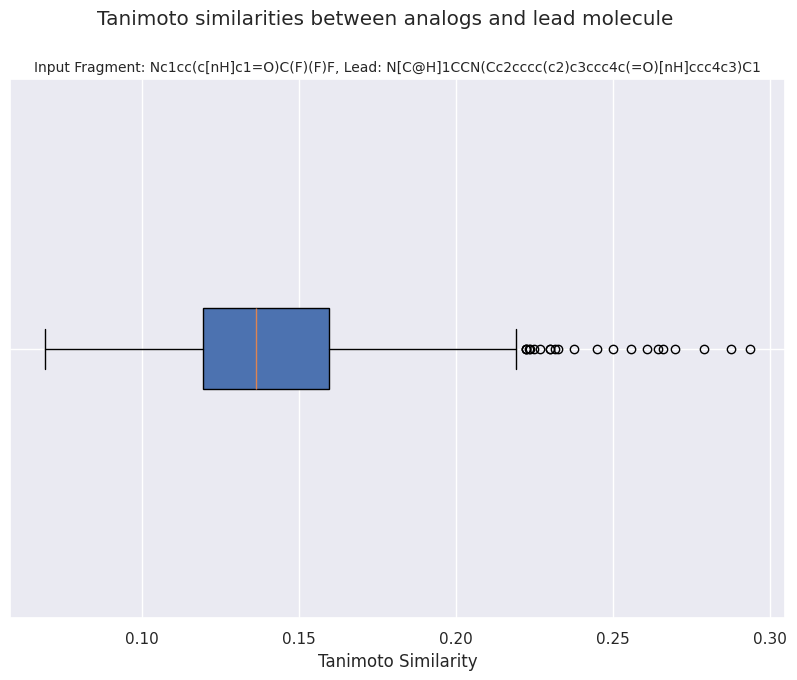

In [57]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot(analogs['sim_to_lead'][1:], vert=False, patch_artist=True)

# plt.plot(analogs['sim_to_lead'][0], 1, 'x', markersize=10, color='red')

plt.xlabel('Tanimoto Similarity')

ax = plt.gca()
ax.set(yticklabels=[])

title = f'Tanimoto similarities between analogs and lead molecule'
subtitle = f'Input Fragment: {initial_fragment_smiles}, Lead: {lead_smiles}'

fig.suptitle(title)
plt.title(subtitle, fontsize=10);

### Now trying across priors...

## MORE MOLECULES

In [ ]:
initial_fragment_smiles, lead_smiles = fragment_lead_pairs['Fragment'], fragment_lead_pairs['Lead']

In [ ]:
for frag, lead in zip(initial_fragment_smiles, lead_smiles):

    frag += '\n'
    
    f = open("data/mol2mol.smi", "a")
    f.write(frag)
    f.close()

In [ ]:
analogs

,SMILES,Input_SMILES,Tanimoto,NLL
0,COc1c[nH]c(=O)c(N)c1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.450000,6.027443
1,CN1C[C@H](O)[C@@H](c2c(F)cccc2F)C1=O,Cc1ccc([C@H]2C(=O)N(C)C[C@H]2O)cc1,0.473684,5.540741
2,CSCC[C@H]1NC(=O)N(c2cccc(F)c2)C1=O,O=C1N[C@@H](Cc2ccccc2)C(=O)N1c1cncc(F)c1,0.447368,5.973771
3,Nc1ccccc1-c1nnn[nH]1,c1ccc(-c2ccccc2-c2nnn[nH]2)cc1,0.508772,3.187813
4,COCCNC(=O)C(N)Cc1ccc(F)cc1,CN(C)C(=O)C(N)Cc1ccc(F)cc1,0.553571,6.512230
...,...,...,...,...
3411,N#Cc1cc2c([nH]c1=O)CC(OCCc1ccccc1)OC2,CC(C)C1Cc2[nH]c(=O)c(C#N)cc2CO1,0.569231,13.218761
3412,CN(C)C(=O)c1ccccc1O,O=C(O)c1ccccc1O,0.333333,4.657554
3413,O=C(O)c1cc(-c2ccccc2)n(-c2ccc(C(F)(F)F)cc2)n1,O=C(O)c1cc(-c2ccccc2)n(-c2ccccc2)n1,0.446429,5.074320
3414,O=C(CN[C@H]1C[C@@H]2CC[C@H]1C2)N1CCCCC1,O=C(CN1CCNCC1)N1CCCCC1,0.500000,13.807041


<Axes: >

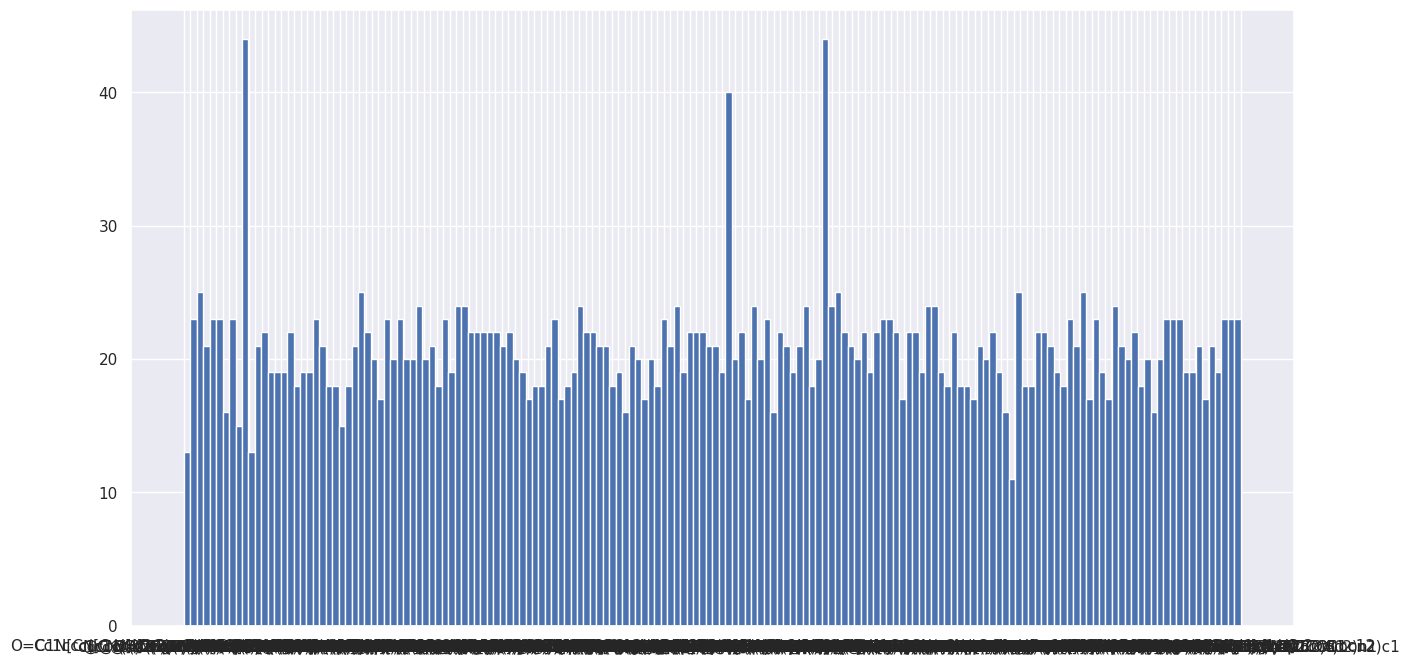

In [ ]:
analogs['Input_SMILES'].hist(bins=164)